In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
import os
from sklearn.utils import shuffle


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
df = pd.read_csv("BBC News.csv")

In [4]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
df.shape

(1490, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [7]:
df['Category'].value_counts()

,count
Category,
sport,346
business,336
politics,274
entertainment,273
tech,261


In [8]:
df['text_length'] = df['Category'].apply(len)
print("\nText Length Statistics:")
print(df['text_length'].describe())



Text Length Statistics:
count    1490.000000
mean        7.518792
std         3.041020
min         4.000000
25%         5.000000
50%         8.000000
75%         8.000000
max        13.000000
Name: text_length, dtype: float64


In [9]:
target_category = df['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [10]:
df['CategoryId'] = df['Category'].factorize()[0]
df.head()

,ArticleId,Text,Category,text_length,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,8,0
1,154,german business confidence slides german busin...,business,8,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,8,0
3,1976,lifestyle governs mobile choice faster bett...,tech,4,1
4,917,enron bosses in $168m payout eighteen former e...,business,8,0


In [11]:
filter = df[df['CategoryId'] == 2]
filter

,ArticleId,Text,Category,text_length,CategoryId
5,1582,howard truanted to play snooker conservative...,politics,8,2
10,1683,blair rejects iraq advice calls tony blair has...,politics,8,2
28,1527,uk will stand firm on eu rebate britain s £3b...,politics,8,2
33,2100,security papers found in street an inquiry i...,politics,8,2
52,1763,mps quiz aides over royal income senior offici...,politics,8,2
...,...,...,...,...,...
1456,955,blair told to double overseas aid tony blair i...,politics,8,2
1463,2102,abbas will not tolerate attacks palestinian ...,politics,8,2
1472,1806,kelly trails new discipline power teachers cou...,politics,8,2
1475,980,budget to set scene for election gordon brown ...,politics,8,2


In [12]:
d  = df[df['Category'] == 'sport']
d

,ArticleId,Text,Category,text_length,CategoryId
6,651,wales silent on grand slam talk rhys williams ...,sport,5,3
14,707,ireland 21-19 argentina an injury-time dropped...,sport,5,3
15,1588,wenger signs new deal arsenal manager arsene w...,sport,5,3
17,486,hantuchova in dubai last eight daniela hantuch...,sport,5,3
18,1344,melzer shocks agassi in san jose second seed a...,sport,5,3
...,...,...,...,...,...
1467,937,charvis set to lose fitness bid flanker colin ...,sport,5,3
1468,454,preview: ireland v england (sun) lansdowne roa...,sport,5,3
1471,1870,ferrero eyes return to top form former world n...,sport,5,3
1473,304,dallaglio eyeing lions tour place former engla...,sport,5,3


Exploratory Data Analysis(EDA)


In [13]:
category = df[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


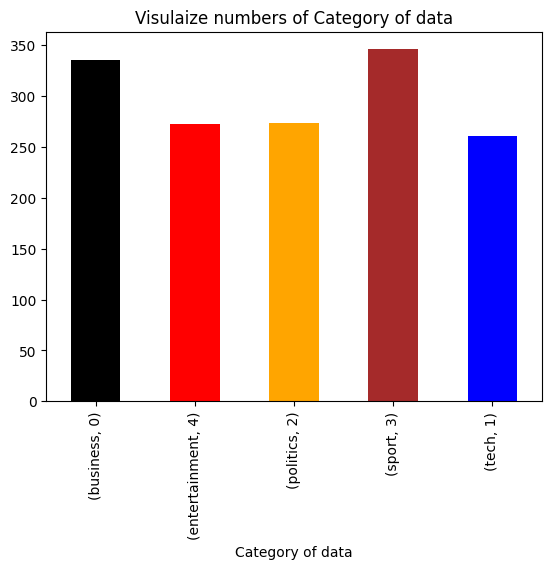

In [14]:
df.groupby('Category').CategoryId.value_counts().plot(kind = 'bar',color = ['black','red','orange','brown','blue'])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()


In [15]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


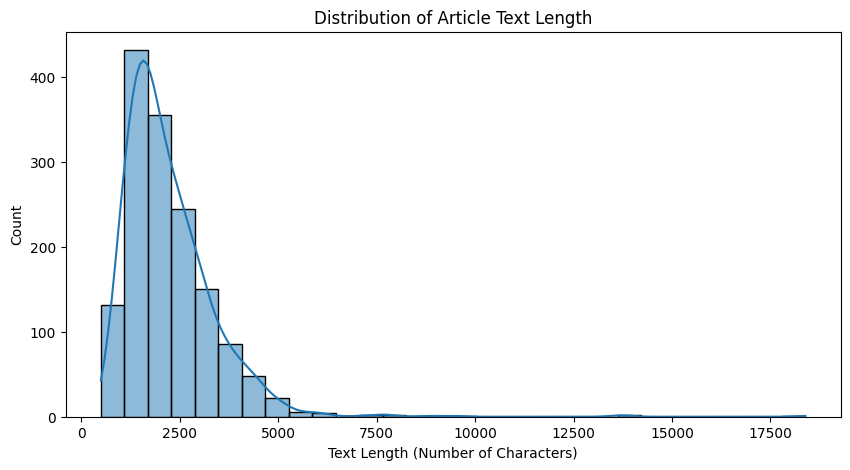

In [16]:
df['text_length'] = df['Text'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Article Text Length')
plt.xlabel('Text Length (Number of Characters)')
plt.show()

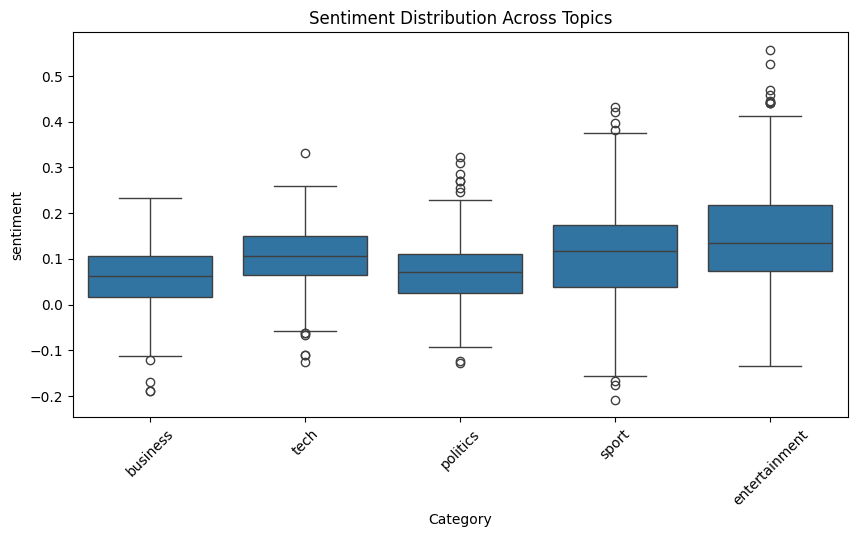

In [17]:
from textblob import TextBlob

df['sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Category', y='sentiment')
plt.title('Sentiment Distribution Across Topics')
plt.xticks(rotation=45)
plt.show()

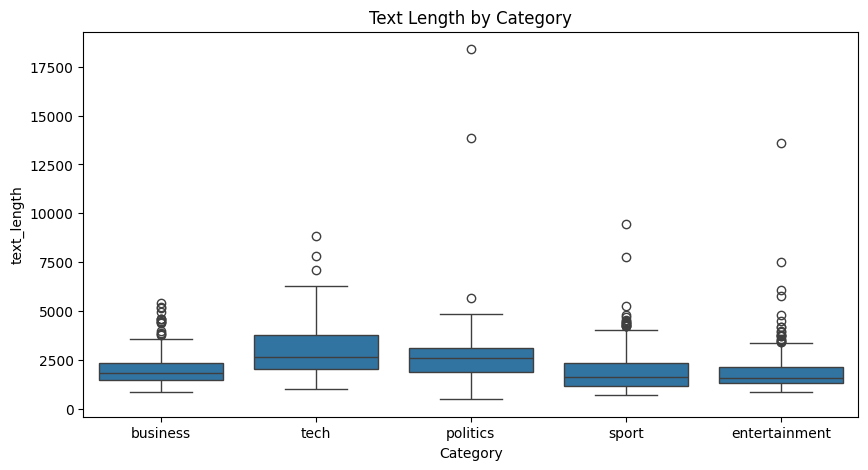

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Category', y='text_length')
plt.title('Text Length by Category')
plt.show()

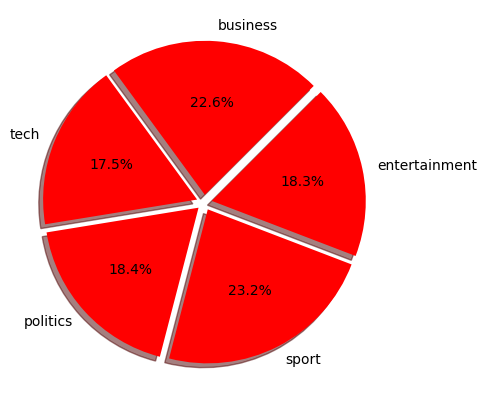

In [19]:
fig = plt.figure(figsize = (5,5))
colors = ["red"]
business = df[df['CategoryId'] == 0 ]
tech = df[df['CategoryId'] == 1 ]
politics = df[df['CategoryId'] == 2]
sport = df[df['CategoryId'] == 3]
entertainment = df[df['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

In [20]:
from sklearn.ensemble import IsolationForest

sports_articles = df[df['Category'] == 'sport']

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sports_articles['Text'])

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.2, random_state=42)
iso_forest.fit(X.toarray())

# Predict anomalies (-1 indicates anomaly)
anomalies = iso_forest.predict(X.toarray())

# Display results
sports_articles['anomaly'] = anomalies
sports_articles['anomaly'] = sports_articles['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

print(sports_articles[['Category', 'Text', 'anomaly']])

     Category                                               Text  anomaly
6       sport  wales silent on grand slam talk rhys williams ...   Normal
14      sport  ireland 21-19 argentina an injury-time dropped...   Normal
15      sport  wenger signs new deal arsenal manager arsene w...   Normal
17      sport  hantuchova in dubai last eight daniela hantuch...   Normal
18      sport  melzer shocks agassi in san jose second seed a...   Normal
...       ...                                                ...      ...
1467    sport  charvis set to lose fitness bid flanker colin ...   Normal
1468    sport  preview: ireland v england (sun) lansdowne roa...  Anomaly
1471    sport  ferrero eyes return to top form former world n...   Normal
1473    sport  dallaglio eyeing lions tour place former engla...   Normal
1481    sport  liverpool pledge to keep gerrard liverpool chi...   Normal

[346 rows x 3 columns]


<ipython-input-20-04477342bc6c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sports_articles['anomaly'] = anomalies
<ipython-input-20-04477342bc6c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sports_articles['anomaly'] = sports_articles['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')


In [21]:
sports_articles = df[df['Category'] == 'tech']

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sports_articles['Text'])

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.2, random_state=42)
iso_forest.fit(X.toarray())

# Predict anomalies (-1 indicates anomaly)
anomalies = iso_forest.predict(X.toarray())

# Display results
sports_articles['anomaly'] = anomalies
sports_articles['anomaly'] = sports_articles['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

print(sports_articles[['Category', 'Text', 'anomaly']])

     Category                                               Text  anomaly
3        tech  lifestyle  governs mobile choice  faster  bett...   Normal
19       tech  moving mobile improves golf swing a mobile pho...   Normal
24       tech  bt boosts its broadband packages british telec...   Normal
26       tech  peer-to-peer nets  here to stay  peer-to-peer ...   Normal
30       tech  pompeii gets digital make-over the old-fashion...  Anomaly
...       ...                                                ...      ...
1469     tech  warnings on woeful wi-fi security companies ar...   Normal
1477     tech  web logs aid disaster recovery some of the mos...  Anomaly
1482     tech  file-swappers ready new network legal attacks ...   Normal
1488     tech  apple ipod family expands market apple has exp...   Normal
1489     tech  santy worm makes unwelcome visit thousands of ...   Normal

[261 rows x 3 columns]


<ipython-input-21-58862db9da60>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sports_articles['anomaly'] = anomalies
<ipython-input-21-58862db9da60>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sports_articles['anomaly'] = sports_articles['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')


business related words:


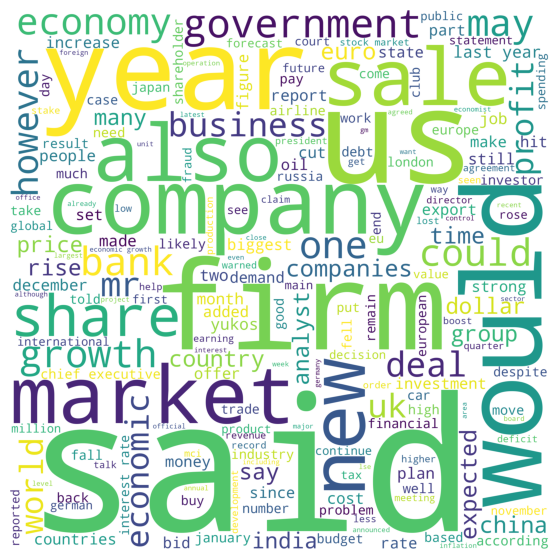

tech related words:


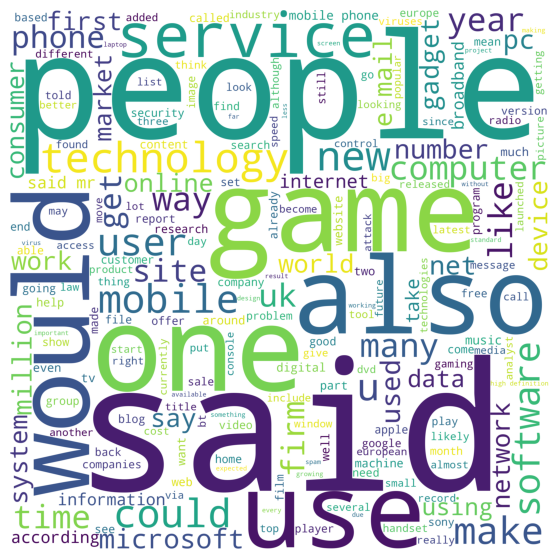

politics related words:


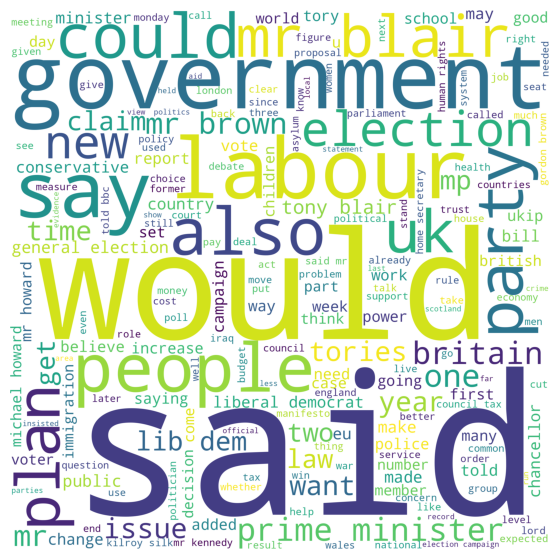

sport related words:


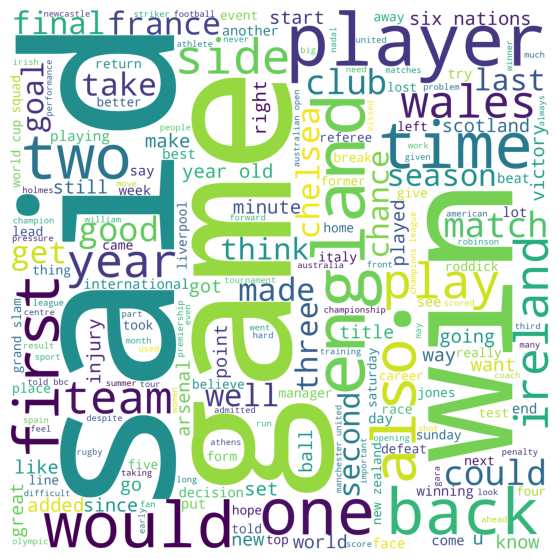

entertainment related words:


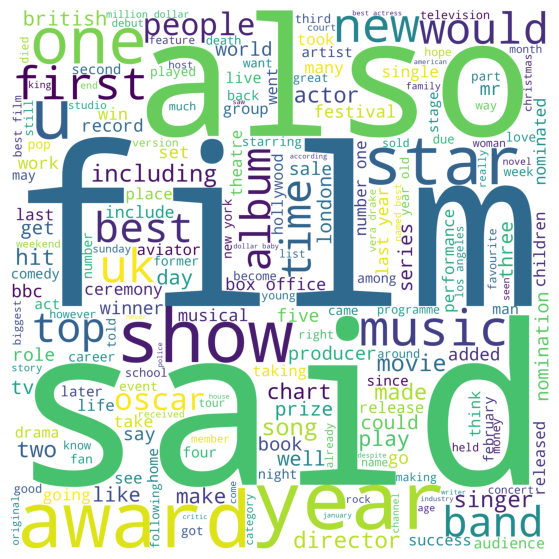

In [22]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = df[df['CategoryId'] == 0]

business = business['Text']

tech = df[df['CategoryId'] == 1]

tech = tech['Text']

politics = df[df['CategoryId'] == 2]

politics = politics['Text']

sport = df[df['CategoryId'] == 3]

sport = sport['Text']

entertainment = df[df['CategoryId'] == 4]

entertainment = entertainment['Text']

def wordcloud_draw(df, color = 'white'):

  words = ' '.join(df)

  cleaned_word = ' '.join([word for word in words.split()

                        if (word != 'news' and word != 'text')])

  wordcloud = WordCloud(stopwords = stop,background_color = 'white',width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))

  plt.imshow(wordcloud)

  plt.axis("off")

  plt.show()

print("business related words:")

wordcloud_draw(business, 'white')

print("tech related words:")

wordcloud_draw(tech, 'white')

print("politics related words:")

wordcloud_draw(politics, 'white')

print("sport related words:")

wordcloud_draw(sport, 'white')

print("entertainment related words:")

wordcloud_draw(entertainment, 'white')



In [23]:
unique_words = set()
df['Text'].apply(lambda x: unique_words.update(x.split()))
print(f'Total unique words in the dataset: {len(unique_words)}')

Total unique words in the dataset: 35594


In [24]:
!pip install beautifulsoup4


Text Preparation


Removing HTML tags

In [25]:
def contains_html_tags(Text):

    return bool(re.search(r'<[^>]+>', Text))

In [26]:
def remove_html_tags(Text):
    """Removes HTML tags from a given text string, preserving special characters."""
    soup = BeautifulSoup(Text, "html.parser")
    for data in soup(['style', 'script']):  # Remove unwanted tags
        data.decompose()

    text = ' '.join(soup.stripped_strings)  # Extract text with preserved special chars
    return text
    print(text)


In [27]:
text = df["Text"]
text.head(10)

,Text
0,worldcom ex-boss launches defence lawyers defe...
1,german business confidence slides german busin...
2,bbc poll indicates economic gloom citizens in ...
3,lifestyle governs mobile choice faster bett...
4,enron bosses in $168m payout eighteen former e...
5,howard truanted to play snooker conservative...
6,wales silent on grand slam talk rhys williams ...
7,french honour for director parker british film...
8,car giant hit by mercedes slump a slump in pro...
9,fockers fuel festive film chart comedy meet th...


In [28]:
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
df['Text'] = df['Text'].apply(remove_tags)

In [29]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
df['Text'] = df['Text'].apply(special_char)
df['Text'][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1 

Converting the text into Lower Case

In [30]:
def convert_lower(text):
   return text.lower()
df['Text'] = df['Text'].apply(convert_lower)
df['Text'][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1 

In [31]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Remove all stop words

In [32]:
def remove_stopwords(Text):
  text = " ".join(text) if isinstance(Text, list) else Text
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(Text)
  return [x for x in words if x not in stop_words]
df['Text'] = df['Text'].apply(remove_stopwords)
df['Text'][1]

['german',
 'business',
 'confidence',
 'slides',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hopes',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'months',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sectors',
 'worsened',
 'observers',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'r

Lemmatization

In [33]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df['Text'] = df['Text'].apply(lemmatize_word)
df['Text'][2]

'bbc poll indicates economic gloom citizen majority nation surveyed bbc world service poll believe world economy worsening respondent also said national economy getting worse asked family financial outlook majority 14 country said positive future almost 23 000 people 22 country questioned poll mostly conducted asian tsunami disaster poll found majority plurality people 13 country believed economy going downhill compared respondent nine country believed improving surveyed three country split percentage term average 44 respondent country said world economy getting worse compared 34 said improving similarly 48 pessimistic national economy 41 optimistic 47 saw family economic condition improving 36 said getting worse poll 22 953 people conducted international polling firm globescan together program international policy attitude pipa university maryland world economy picked difficult time year ago people seem fully absorbed development though personally experiencing effect said pipa directo

Stemming

In [34]:
def stem_words(text):

    # Initialize PorterStemmer
    ps = PorterStemmer()

    # Check if text is a list or string
    if isinstance(text, str):
        text = word_tokenize(text)  # Tokenize if it's a string

    # Stem each word in the list
    stemmed_words = [ps.stem(word) for word in text]

    return stemmed_words

# Assuming you have your DataFrame 'df' with the 'Text' column:
df['Text'] = df['Text'].apply(stem_words)
df['Text'][1]

['german',
 'busi',
 'confid',
 'slide',
 'german',
 'busi',
 'confid',
 'fell',
 'februari',
 'knock',
 'hope',
 'speedi',
 'recoveri',
 'europ',
 'largest',
 'economi',
 'munich',
 'base',
 'research',
 'institut',
 'ifo',
 'said',
 'confid',
 'index',
 'fell',
 '95',
 '5',
 'februari',
 '97',
 '5',
 'januari',
 'first',
 'declin',
 'three',
 'month',
 'studi',
 'found',
 'outlook',
 'manufactur',
 'retail',
 'sector',
 'worsen',
 'observ',
 'hope',
 'confid',
 'busi',
 'sector',
 'would',
 'signal',
 'econom',
 'activ',
 'pick',
 'surpris',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidenstein',
 'main',
 'reason',
 'probabl',
 'domest',
 'economi',
 'still',
 'weak',
 'particularli',
 'retail',
 'trade',
 'economi',
 'labour',
 'minist',
 'wolfgang',
 'clement',
 'call',
 'dip',
 'februari',
 'ifo',
 'confid',
 'figur',
 'mild',
 'declin',
 'said',
 'despit',
 'retreat',
 'index',
 'remain',
 'rel',
 'high',
 'level',
 'expect',
 'mode

In [35]:
pip install pyspellchecker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 21.1 MB/s eta 0:00:00


Most Commonly used words


In [36]:
from collections import Counter
cnt = Counter()
for text in df["Text"].values:
    for word in text:
        cnt[word] += 1
cnt.most_common(10)

[('said', 4839),
 ('year', 2172),
 ('mr', 2007),
 ('would', 1714),
 ('also', 1426),
 ('new', 1338),
 ('peopl', 1325),
 ('one', 1277),
 ('u', 1273),
 ('time', 1094)]

POS Tagging

In [37]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk import pos_tag as nltk_pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [38]:
words = df['Text'].head(3)


words = [' '.join(map(str, sublist)) for sublist in words.tolist()]

pos_tags = nltk_pos_tag(words)
# Displaying the PoS tagged result in separate lines
print("Original Text:")
print(words)

print("\nPoS Tagging Result:")
for word, pos_tag in pos_tags:
    print(f"{word}: {pos_tag}")

Original Text:
['worldcom ex bo launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first wit cynthia cooper worldcom ex head intern account alert director irregular account practic u telecom giant 2002 warn led collaps firm follow discoveri 11bn 5 7bn account fraud mr ebber plead guilti charg fraud conspiraci prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estim m cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002 said andersen given green light procedur practic use worldcom mr ebber lawyer said unawar fraud argu auditor alert problem m cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book howev m cooper said mr

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


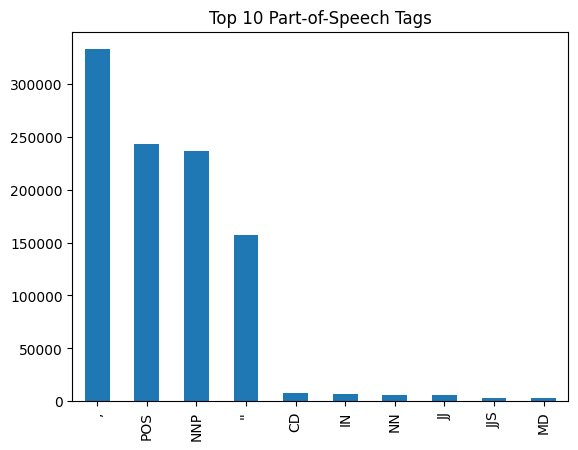

In [39]:
import nltk
nltk.download('averaged_perceptron_tagger')

def pos_tags(Text):
    Text = str(Text)
    tokens = nltk.word_tokenize(Text)
    pos_tags = nltk.pos_tag(tokens)
    pos_counts = Counter(tag for word, tag in pos_tags)
    return pos_counts

pos_df = df['Text'].apply(pos_tags).apply(pd.Series).fillna(0)
pos_df.sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Part-of-Speech Tags')
plt.show()

Feature Engineering

In [40]:
x = df['Text']
y = df['CategoryId']

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df.iloc[:,0].values)
y = np.array(df.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
df['Text'] = df['Text'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else tokens)
x = cv.fit_transform(df.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043
447


In [43]:
perform_list = [ ]

In [44]:
def run_model(model_name, est_c, est_pnlty):
  # Indent the entire function body
  mdl=''

  if model_name == 'Logistic Regression':
    mdl = LogisticRegression() # further indent code blocks within if statements
  elif model_name == 'Random Forest':
    mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
  elif model_name == 'Multinomial Naive Bayes':
    mdl = MultinomialNB(alpha=1.0,fit_prior=True)
  elif model_name == 'Support Vector Classifer':
    mdl = SVC()
  elif model_name == 'Decision Tree Classifier':
    mdl = DecisionTreeClassifier()
  elif model_name == 'K Nearest Neighbour':
    mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
  elif model_name == 'Gaussian Naive Bayes':
    mdl = GaussianNB()

  oneVsRest = OneVsRestClassifier(mdl)
  oneVsRest.fit(x_train, y_train)
  y_pred = oneVsRest.predict(x_test)

  # Performance metrics
  accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

  # Get precision, recall, f1 scores
  precision, recall, f1score, support = score(y_test, y_pred, average='micro')

  print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
  print(f'Precision : {precision}')
  print(f'Recall : {recall}')
  print(f'F1-score : {f1score}')

  # Add performance parameters to list
  perform_list.append(dict([
      ('Model', model_name),
      ('Test Accuracy', round(accuracy, 2)),
      ('Precision', round(precision, 2)),
      ('Recall', round(recall, 2)),
      ('F1', round(f1score, 2))
  ]))

In [45]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 97.32
Precision : 0.9731543624161074
Recall : 0.9731543624161074
F1-score : 0.9731543624161074


In [46]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 97.32
Precision : 0.9731543624161074
Recall : 0.9731543624161074
F1-score : 0.9731543624161074


In [47]:
from sklearn.tree import DecisionTreeClassifier
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 80.98
Precision : 0.8098434004474273
Recall : 0.8098434004474273
F1-score : 0.8098434004474273


In [48]:
from sklearn.neighbors import KNeighborsClassifier
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 72.04
Precision : 0.7203579418344519
Recall : 0.7203579418344519
F1-score : 0.7203579418344519


In [49]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,97.32,0.97,0.97,0.97
1,Random Forest,97.32,0.97,0.97,0.97
2,Decision Tree Classifier,80.98,0.81,0.81,0.81
3,K Nearest Neighbour,72.04,0.72,0.72,0.72


Hyper Parameter Tuning

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [51]:
log_reg = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
    'penalty': ['l1', 'l2'],  # Type of regularization
}

In [52]:
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [53]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV





In [55]:
dt = DecisionTreeClassifier()

In [56]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
}

In [57]:
grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [58]:

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
rf = RandomForestClassifier()

In [61]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [62]:
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

Fit model and Predictions with Random Forest


In [63]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [64]:
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive
enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of
                        games for the team, and I am not feeling backed, said Ashwin'])

In [65]:
yy = classifier.predict(y_pred1)

In [66]:
result = ""

In [67]:
if yy == [0]:
    result = "Business News"
elif yy == [1]:
    result = "Tech News"
elif yy == [2]:
    result = "Politics News"
elif yy == [3]:
    result = "Sports News"
elif yy == [1]:
    result = "Entertainment News"

print(result)

Sports News


Fit and Predictions with Logistic Regression

In [105]:
classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = classifier.predict(x_test)

In [106]:
input = cv.transform(["The latest Marvel movie has smashed box office records, grossing $1 billion in just a week."])

In [110]:
yy = classifier.predict(input)
result = ""
if yy == [0]:
    result = "Business News"
elif yy == [1]:
    result = "Tech News"
elif yy == [2]:
    result = "Politics News"
elif yy == [3]:
    result = "Sports News"
elif yy == [1]:
    result = "Entertainment News"

print(result)

Sports News


Fit and Predict with K-Nearest Neighbour

In [111]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [112]:
test_predictions = knn_classifier.predict(x_test)

In [121]:
new_input_text = cv.transform(["Apple unveiled its new iPhone series, featuring advanced camera capabilities and improved battery life."])

In [122]:
new_prediction = knn_classifier.predict(new_input_text)

In [124]:
prediction_result = ""
if new_prediction == [0]:
    prediction_result = "Business News"
elif new_prediction == [1]:
    prediction_result = "Tech News"
elif new_prediction == [2]:
    prediction_result = "Politics News"
elif new_prediction == [3]:
    prediction_result = "Sports News"
elif new_prediction == [4]:
    prediction_result = "Entertainment News"

In [118]:
print(prediction_result)

Sports News
